In [1]:
from ultralytics.data.dataset import YOLODataset,YoloTrackingDataset
import cv2 
from matplotlib import pyplot as plt 
import torch 
from tqdm import tqdm
import numpy as np 
from ultralytics.data.utils import check_cls_dataset, check_det_dataset
from ultralytics.utils import (DEFAULT_CFG, LOGGER, RANK, TQDM_BAR_FORMAT, __version__, callbacks, clean_url, colorstr,
                               emojis, yaml_save)
from ultralytics.cfg import get_cfg, get_save_dir
%matplotlib inline 

In [30]:
images_path = '/mnt/DD5/PedestrainDetection/CUHK-SYSU/images'
imgsz = 320
mode = 'train'
cfg = get_cfg(DEFAULT_CFG)
data_conf = '/mnt/DD5/PedestrainDetection/CUHK-SYSU/data.yaml'
data = check_det_dataset(data_conf)
dataset = YoloTrackingDataset(img_path=images_path,
        imgsz=imgsz,
        batch_size=1,
        augment=mode == 'train',  # augmentation
        use_segments=False,
        use_keypoints=False,
        data=data
        
)

Scanning /mnt/DD5/PedestrainDetection/CUHK-SYSU/labels... 18184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18184/18184 [00:06<00:00, 2758.03it/s]
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s10349.jpg: 1 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s10825.jpg: 1 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s1453.jpg: 1 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s1590.jpg: 1 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s3981.jpg: 3 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s4573.jpg: 1 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s4940.jpg: 6 duplicate labels removed
WARNING ⚠️ /mnt/DD5/PedestrainDetection/CUHK-SYSU/images/s888.jpg: 1 duplicate labels removed
New cache created: /mnt/DD5/PedestrainDetection/CUHK-SYSU/labels.cache


In [34]:
result = dataset.__getitem__(3)
print(result.keys())
bboxes = result['bboxes'].numpy()
embeddings = result['embeddings'].numpy()
img = torch.permute(result['img'],(1,2,0) ).numpy().astype(np.uint8).copy()

dict_keys(['im_file', 'ori_shape', 'resized_shape', 'img', 'cls', 'bboxes', 'embeddings', 'batch_idx'])


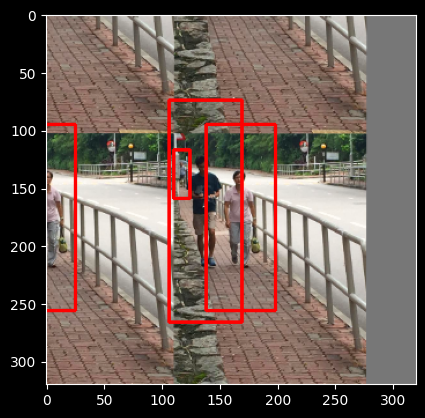

In [35]:

H,W, _ = img.shape 
for i in range(bboxes.shape[0]):
    bb = bboxes[i]
    x0 = int((bb[0] - bb[2])*W)
    x1 = int((bb[0] + bb[2])*W)
    y0 = int((bb[1] - bb[3])*H)
    y1 = int((bb[1] + bb[3])*H)
    img  = cv2.rectangle(img,(x0,y0),(x1,y1),(255,0,0),2)
plt.imshow(img)

In [36]:
print(bboxes.shape)
print(embeddings.shape)

(4, 4)
(4, 32)
